https://suakii.notion.site/CNN-154c222273a78070bc4dfaa7ab709978

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
%cd /content/drive/MyDrive/data/


/content/drive/MyDrive/data


In [ ]:
!pwd

/content/drive/MyDrive/data


In [ ]:
!ls

'2024 정보교사 직무연수(심화)_241207_4. 합성곱 신경망 원리와 실습1_경기과학고.ipynb'
'2024 정보교사 직무연수(심화)_241207_4. 합성곱 신경망 원리와 실습2_경기과학고.ipynb'
'241207_4. 합성곱 신경망 원리와 실습2_최종버전.ipynb'
 merged_data
 merged_data.zip
 rps_mobilenetv2_1120.h5


In [ ]:
# 시스템 명령어로 압축 해제
!unzip  merged_data.zip
print("merged_data.zip 압축 해제 완료")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: merged_data/test/paper/nasmi_276.png  
  inflating: merged_data/test/paper/nasmi_278.png  
  inflating: merged_data/test/paper/nasmi_289.png  
  inflating: merged_data/test/paper/testpaper03-27.png  
  inflating: merged_data/test/paper/nasmi_167.png  
  inflating: merged_data/test/paper/testpaper02-23.png  
  inflating: merged_data/test/paper/nasmi_314.png  
  inflating: merged_data/test/paper/nasmi_335.png  
  inflating: merged_data/test/paper/nasmi_308.png  
  inflating: merged_data/test/paper/nasmi_333.png  
  inflating: merged_data/test/paper/testpaper04-03.png  
  inflating: merged_data/test/paper/nasmi_288.png  
  inflating: merged_data/test/paper/nasmi_180.png  
  inflating: merged_data/test/paper/nasmi_192.png  
  inflating: merged_data/test/paper/nasmi_204.png  
  inflating: merged_data/test/paper/nasmi_332.png  
  inflating: merged_data/test/paper/testpaper04-00.png  
  inflating: merged_data/test/paper/nasmi_336.png  
  inflat

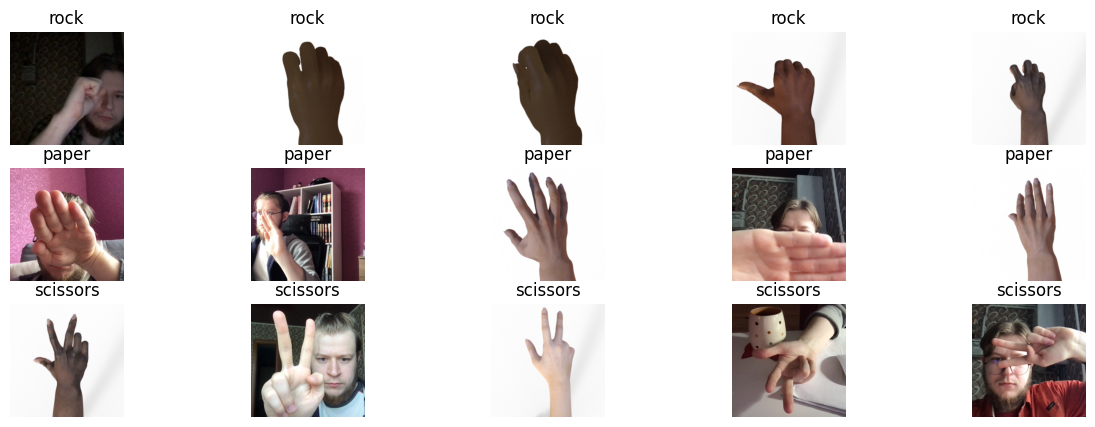

In [ ]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

base_dir = "/content/drive/MyDrive/data/merged_data/train"
categories = ["rock", "paper", "scissors"]

images = []
labels = []

for category in categories:
    folder_path = os.path.join(base_dir, category)
    image_files = os.listdir(folder_path)[:5]
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        images.append(imread(image_path))
        labels.append(category)

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(labels[i])
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# CNN 모델 정의
model = Sequential()

model.add(Conv2D(10, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(10, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(10, (3, 3), activation='relu'))
model.add(Conv2D(10, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 62, 62, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │           5,073 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,083 (31.57 KB)

 Trainable params: 8,083 (31.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN 모델 정의
model = Sequential([
    # Input Layer (64, 64, 3)

    Conv2D(10, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    Conv2D(10, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Conv2D(10, (3, 3), activation='relu'),
    Conv2D(10, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    Flatten(),
    Dense(3, activation='softmax')
])

# 모델 요약 출력
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 62, 62, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 60, 60, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           5,073 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,083 (31.57 KB)

 Trainable params: 8,083 (31.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

inputs = Input(shape=(64, 64, 3))

x = Conv2D(10, (3, 3), activation='relu')(inputs)
x = Conv2D(10, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

x = Conv2D(10, (3, 3), activation='relu')(x)
x = Conv2D(10, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

x = Flatten()(x)
outputs = Dense(3, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# 모델 요약 출력
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 62, 62, 10)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 10)          │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │           5,073 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,083 (31.57 KB)

 Trainable params: 8,083 (31.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 입출력 속도 개선을 위해 이동 - 세션 삭제후 사라짐.

!cp -r /content/drive/MyDrive/data/merged_data /content/
print("Finish")

Finish


In [ ]:
# 이미지 전처리 따로 하지 않고 사이즈만 조정하는 이미지 데이터 제너레이터 사용.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# 데이터 경로 설정
# base_dir = "/content/drive/MyDrive/data/merged_data"
base_dir = "/content/merged_data"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# 데이터 전처리 (크기 조정만 수행)
train_datagen = ImageDataGenerator()  # 전처리 없음
val_datagen = ImageDataGenerator()    # 전처리 없음
test_datagen = ImageDataGenerator()   # 전처리 없음

# 데이터 로드
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # 크기 조정만 수행
    batch_size=32,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(64, 64),  # 크기 조정만 수행
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),  # 크기 조정만 수행
    batch_size=32,
    class_mode='categorical'
)
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)
# 테스트 데이터 평가
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.2%}")


Found 3036 images belonging to 3 classes.
Found 1308 images belonging to 3 classes.
Found 912 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 23s 202ms/step - accuracy: 0.5159 - loss: 4.1374 - val_accuracy: 0.5436 - val_loss: 1.2642
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 16s 159ms/step - accuracy: 0.8046 - loss: 0.5417 - val_accuracy: 0.5780 - val_loss: 1.4244
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 148ms/step - accuracy: 0.8884 - loss: 0.3211 - val_accuracy: 0.5902 - val_loss: 1.5520
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - accuracy: 0.9150 - loss: 0.2212 - val_accuracy: 0.6223 - val_loss: 1.3162
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.9491 - loss: 0.1374 - val_accuracy: 0.6093 - val_loss: 1.5489
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.9652 - loss: 0.0996 - val_accuracy: 0.6361 - val_loss: 1.5059
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 154ms/step - accuracy: 0.9700 - loss: 0.0791 - val_accuracy: 0.6223 - val_loss: 1.7958
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 0.9885 - loss: 0.0430 - val_accuracy: 0.636

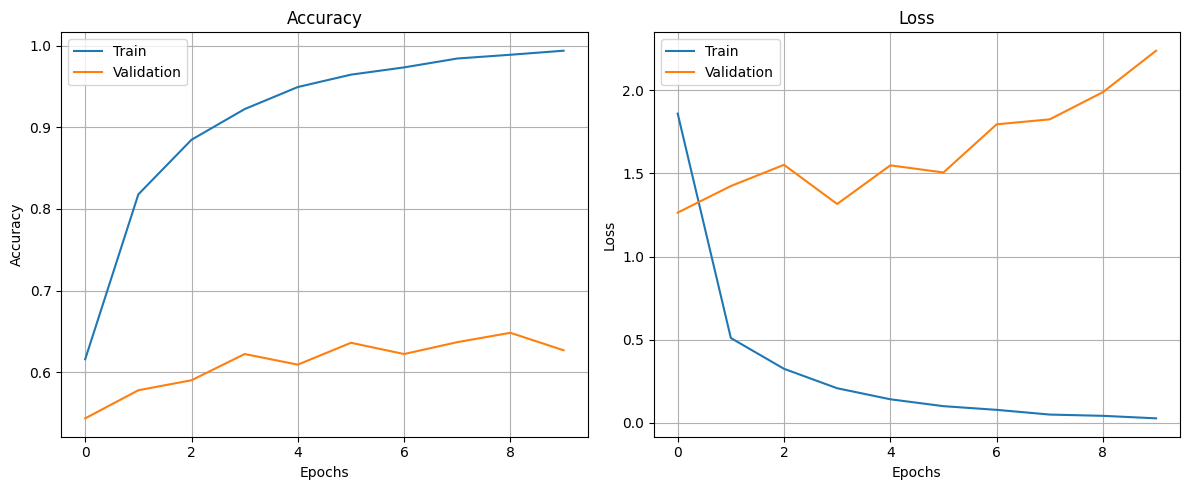

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, Reshape
from tensorflow.keras.models import Model
import os

# 데이터 경로 설정
# base_dir = "/content/drive/MyDrive/data/merged_data"
base_dir = "/content/merged_data"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# 데이터 전처리 (크기 조정 + MobileNetV2 사전 처리만 수행)
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# 데이터 로드
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # MobileNetV2의 기본 입력 크기
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# MobileNetV2 모델
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Reshape((7 * 7 * 1280,))(x)  # Reshape으로 텐서를 2D로 변환
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # 3클래스

model = Model(inputs=base_model.input, outputs=predictions)

# 사전 학습된 가중치를 동결
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# 테스트 데이터 평가
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"테스트 정확도: {test_accuracy:.2%}")



Found 3036 images belonging to 3 classes.
Found 1308 images belonging to 3 classes.
Found 912 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 42s 315ms/step - accuracy: 0.7222 - loss: 6.5262 - val_accuracy: 0.7248 - val_loss: 0.6497
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 26s 211ms/step - accuracy: 0.8790 - loss: 0.2884 - val_accuracy: 0.7339 - val_loss: 0.7263
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 40s 200ms/step - accuracy: 0.9147 - loss: 0.2053 - val_accuracy: 0.7125 - val_loss: 0.6659
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 251ms/step - accuracy: 0.9184 - loss: 0.1758 - val_accuracy: 0.7630 - val_loss: 0.5011
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.9388 - loss: 0.1391 - val_accuracy: 0.7905 - val_loss: 0.5593
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - accuracy: 0.9342 - loss: 0.1635 - val_accuracy: 0.8073 - val_loss: 0.5490
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.9306 - loss: 0.1558 - val_accuracy: 0.7806 - val_loss: 0.6180
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.9482 - loss: 0.1365 - val_accuracy: 0.754

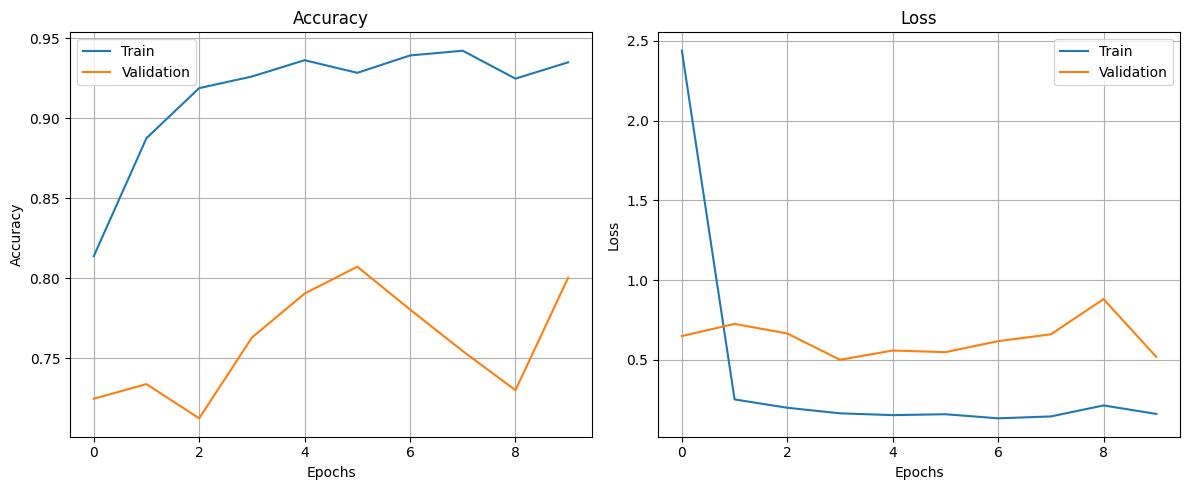

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop
# 2단계: Fine-Tuning
# MobileNetV2의 상위 층을 학습 가능하도록 설정
fine_tune_at = len(base_model.layers) - 100
for i, layer in enumerate(base_model.layers):
    layer.trainable = i >= fine_tune_at

# 모델 재컴파일: RMSprop, 작은 학습률
model.compile(
    optimizer=RMSprop(learning_rate=1e-4),  # 작은 학습률
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Fine-Tuning 학습
history_fine = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)
# 테스트 데이터 평가
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"테스트 정확도: {test_accuracy:.2%}")

# 모델 저장
model.save("/content/drive/MyDrive/data/rps_mobilenetv2_1203.h5")



Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 69s 427ms/step - accuracy: 0.8930 - loss: 0.2723 - val_accuracy: 0.8869 - val_loss: 0.5401
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 45s 197ms/step - accuracy: 0.9694 - loss: 0.0669 - val_accuracy: 0.8968 - val_loss: 0.5807
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 214ms/step - accuracy: 0.9814 - loss: 0.0510 - val_accuracy: 0.9182 - val_loss: 0.5127
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - accuracy: 0.9837 - loss: 0.0506 - val_accuracy: 0.9083 - val_loss: 0.7617
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - accuracy: 0.9868 - loss: 0.0765 - val_accuracy: 0.9083 - val_loss: 0.9184
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.9949 - loss: 0.0181 - val_accuracy: 0.9067 - val_loss: 1.0183
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 37s 204ms/step - accuracy: 0.9965 - loss: 0.0082 - val_accuracy: 0.9258 - val_loss: 0.7801
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.9991 - loss: 0.0048 - val_accu

테스트 정확도: 81.47%


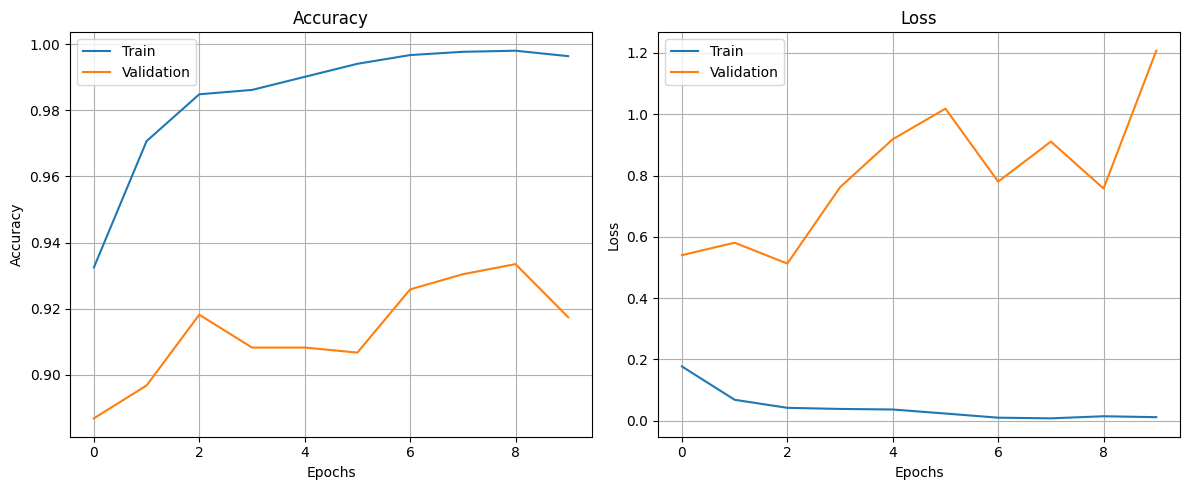

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_fine.history['accuracy'], label='Train')
plt.plot(history_fine.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_fine.history['loss'], label='Train')
plt.plot(history_fine.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img


In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  cv2.imwrite(filename, img)

  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('/content/drive/MyDrive/data/rps_mobilenetv2_1203.h5')
class_labels = ['paper', 'rock', 'scissor']


image_path = '/content/photo.jpg'
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_image = cv2.resize(img_rgb, (224, 224))  # MobileNetV2 입력 크기
input_image = preprocess_input(np.expand_dims(input_image, axis=0))  # 전처리 및 배치 차원 추가

predictions = model.predict(input_image)[0]

probabilities = {class_labels[i]: predictions[i] for i in range(len(class_labels))}

predicted_class = class_labels[np.argmax(predictions)]

print("가위, 바위, 보 예측 확률:")
for label, prob in probabilities.items():
    print(f"{label}: {prob * 100:.2f}%")
print(f"\n예측된 클래스: {predicted_class}")

# 이미지와 확률 표시
plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.axis('off')

# 이미지 아래에 텍스트로 확률 표시
text = "\n".join([f"{label}: {prob * 100:.2f}%" for label, prob in probabilities.items()])
plt.title(text, loc='center', fontsize=12)
plt.show()
